# Policy Comparison

In [1]:
import numpy as np
from binomial_cis import binom_ci

### Load Data

In [2]:
tasks = ["Symbol\nUnderstanding", "Reasoning", "Human\nRecognition"]
n_tasks = len(tasks)

n_rollouts = np.array([50, 110, 30])
vc1_successes = np.array([6, 12, 4])
rt2_successes = np.array([40, 53, 16])


# get mc estimates of success rates
mc_vc1 = vc1_successes / n_rollouts
mc_rt2 = rt2_successes / n_rollouts

### Solve for Confidence Intervals

In [3]:
alpha = 1-np.sqrt(0.95) # miscoverage probability

vc1_ubs = np.array([binom_ci(vc1_successes[i], n_rollouts[i], alpha, 'ub', randomized=True) for i in range(n_tasks)])
rt2_lbs = np.array([binom_ci(rt2_successes[i], n_rollouts[i], alpha, 'lb', randomized=True) for i in range(n_tasks)])

Comuting upper confidence bound
Comuting upper confidence bound
Comuting upper confidence bound
Comuting lower confidence bound
Comuting lower confidence bound
Comuting lower confidence bound


### Plot Results

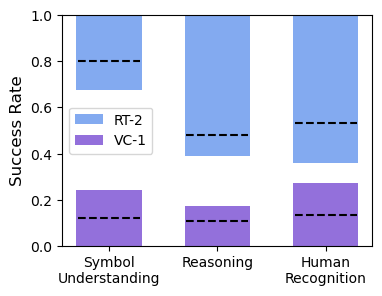

In [4]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (4, 3))
 
# creating the bar plot
plt.bar(tasks, 1-rt2_lbs, color ='cornflowerblue', alpha=0.8, width = 0.6, bottom=rt2_lbs, label="RT-2")
plt.axhline(y=mc_rt2[0], xmin = 0.05, xmax = 0.25, linestyle="--", color="black") 
plt.axhline(y=mc_rt2[1], xmin = 0.4, xmax = 0.6, linestyle="--", color="black") 
plt.axhline(y=mc_rt2[2], xmin = 0.75, xmax = 0.95, linestyle="--", color="black") 

plt.bar(tasks, vc1_ubs, color ='mediumpurple', width = 0.6, label="VC-1")
plt.axhline(y=mc_vc1[0], xmin = 0.05, xmax = 0.25, linestyle="--", color="black") 
plt.axhline(y=mc_vc1[1], xmin = 0.4, xmax = 0.6, linestyle="--", color="black") 
plt.axhline(y=mc_vc1[2], xmin = 0.75, xmax = 0.95, linestyle="--", color="black") 

plt.ylim(0,1)
plt.ylabel("Success Rate", fontsize=12)
plt.legend()
plt.savefig("media/comparison.svg")
plt.show()